#Student Name: Varun Aggarwal
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [6]:
#Import necessary packages
import keras

import numpy as np

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import pickle as cPickle
import matplotlib.pyplot as plt

#Part 0: Importing and normalizing data

In [7]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Part 1: Plotting cross entropy

/apps/spack/gilbreth/apps/anaconda/5.1.0-py27-gcc-4.8.5-4muurok/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


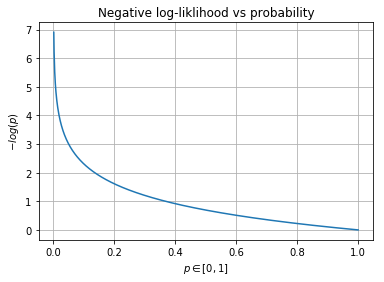

In [8]:
#Show cross-entropy loss function

#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
p = np.linspace(0,1,1000)
z = -np.log(p)
plt.plot(p,z)
plt.title("Negative log-liklihood vs probability")
plt.xlabel("$p \in [0,1]$")
plt.ylabel("$-log(p)$")
plt.grid(True)

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: 

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: 




#Part 2: Overfit CNN

In [9]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    # Layer 1
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))

    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 3
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 5
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))  
    
    return model

#Create instance of CNN model graph
obj = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 9s 144us/step - loss: 1.2545 - acc: 0.5979 - val_loss: 0.7408 - val_acc: 0.7087
Epoch 2/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.6219 - acc: 0.7596 - val_loss: 0.5668 - val_acc: 0.7843
Epoch 3/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.5079 - acc: 0.8109 - val_loss: 0.4998 - val_acc: 0.8164
Epoch 4/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4528 - acc: 0.8342 - val_loss: 0.5176 - val_acc: 0.8084
Epoch 5/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4150 - acc: 0.8497 - val_loss: 0.4456 - val_acc: 0.8418
Epoch 6/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.3828 - acc: 0.8645 - val_loss: 0.4067 - val_acc: 0.8537
Epoch 7/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.3567 - acc: 0.8729 - val_loss: 0.3851 -

60000/60000 [==============================] - 3s 55us/step - loss: 0.1016 - acc: 0.9627 - val_loss: 0.3103 - val_acc: 0.9099
Epoch 60/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0819 - acc: 0.9707 - val_loss: 0.2907 - val_acc: 0.9189
Epoch 61/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0775 - acc: 0.9728 - val_loss: 0.3036 - val_acc: 0.9124
Epoch 62/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0831 - acc: 0.9698 - val_loss: 0.3386 - val_acc: 0.9044
Epoch 63/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0833 - acc: 0.9691 - val_loss: 0.3043 - val_acc: 0.9167
Epoch 64/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0754 - acc: 0.9729 - val_loss: 0.3215 - val_acc: 0.9128
Epoch 65/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0647 - acc: 0.9773 - val_loss: 0.3129 - val_acc: 0.9134
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.5477 - val_acc: 0.9191
Epoch 119/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.5609 - val_acc: 0.9169
Epoch 120/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.5543 - val_acc: 0.9181
Epoch 121/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.5575 - val_acc: 0.9184
Epoch 122/200
60000/60000 [==============================] - 3s 54us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5655 - val_acc: 0.9184
Epoch 123/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0023 - acc: 0.9998 - val_loss: 0.5773 - val_acc: 0.9185
Epoch 124/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5829 - val_acc: 0.9181
Epoch 125/200
60000/

60000/60000 [==============================] - 3s 55us/step - loss: 1.1716e-04 - acc: 1.0000 - val_loss: 0.6837 - val_acc: 0.9181
Epoch 176/200
60000/60000 [==============================] - 3s 55us/step - loss: 1.1706e-04 - acc: 1.0000 - val_loss: 0.6852 - val_acc: 0.9183
Epoch 177/200
60000/60000 [==============================] - 3s 55us/step - loss: 1.1496e-04 - acc: 1.0000 - val_loss: 0.6850 - val_acc: 0.9179
Epoch 178/200
60000/60000 [==============================] - 3s 55us/step - loss: 1.0940e-04 - acc: 1.0000 - val_loss: 0.6890 - val_acc: 0.9182
Epoch 179/200
60000/60000 [==============================] - 3s 55us/step - loss: 1.1136e-04 - acc: 1.0000 - val_loss: 0.6889 - val_acc: 0.9177
Epoch 180/200
60000/60000 [==============================] - 3s 55us/step - loss: 1.0322e-04 - acc: 1.0000 - val_loss: 0.6893 - val_acc: 0.9189
Epoch 181/200
60000/60000 [==============================] - 3s 55us/step - loss: 1.1164e-04 - acc: 1.0000 - val_loss: 0.6940 - val_acc: 0.9183
Epoch 

In [10]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 33us/step
Test Accuracy: 89.85%


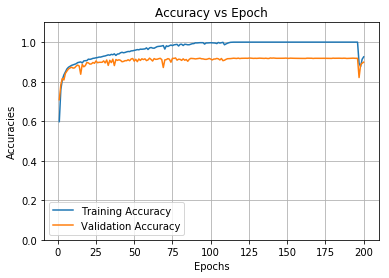

In [12]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1.1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

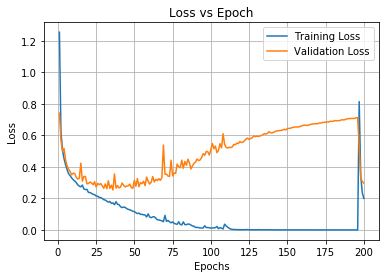

In [13]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 

2.   What does the loss of the testing set go to? 

  ANS: 
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS:

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: 

#Part 3: Dropout on input layer

In [14]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Layer 1 - dropout
    model.add(Dropout(0.3))
    
    # Layer 2
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))

    # Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 4
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    
    # Layer 5
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 6
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal")) 
    
    return model

#Create instance of CNN model graph
obj = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 62us/step - loss: 1.2659 - acc: 0.5369 - val_loss: 0.8323 - val_acc: 0.7087
Epoch 2/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.6770 - acc: 0.7427 - val_loss: 0.7122 - val_acc: 0.7210
Epoch 3/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.6064 - acc: 0.7664 - val_loss: 0.5871 - val_acc: 0.7872
Epoch 4/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.5263 - acc: 0.8022 - val_loss: 0.5942 - val_acc: 0.7814
Epoch 5/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4952 - acc: 0.8160 - val_loss: 0.5542 - val_acc: 0.7986
Epoch 6/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4699 - acc: 0.8257 - val_loss: 0.5065 - val_acc: 0.8195
Epoch 7/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.4381 - acc: 0.8370 - val_loss: 0.5102 - 

60000/60000 [==============================] - 3s 55us/step - loss: 0.2176 - acc: 0.9171 - val_loss: 0.3009 - val_acc: 0.8861
Epoch 60/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.2183 - acc: 0.9174 - val_loss: 0.2944 - val_acc: 0.8907
Epoch 61/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.2183 - acc: 0.9179 - val_loss: 0.3107 - val_acc: 0.8831
Epoch 62/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.2178 - acc: 0.9168 - val_loss: 0.2919 - val_acc: 0.8931
Epoch 63/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.2113 - acc: 0.9198 - val_loss: 0.2837 - val_acc: 0.8950
Epoch 64/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.2055 - acc: 0.9221 - val_loss: 0.2780 - val_acc: 0.8992
Epoch 65/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.2007 - acc: 0.9238 - val_loss: 0.2793 - val_acc: 0.8979
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1454 - acc: 0.9438 - val_loss: 0.3010 - val_acc: 0.8954
Epoch 119/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1341 - acc: 0.9484 - val_loss: 0.2997 - val_acc: 0.8964
Epoch 120/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1373 - acc: 0.9476 - val_loss: 0.3114 - val_acc: 0.8907
Epoch 121/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1368 - acc: 0.9466 - val_loss: 0.2937 - val_acc: 0.8945
Epoch 122/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1368 - acc: 0.9469 - val_loss: 0.3124 - val_acc: 0.8939
Epoch 123/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1339 - acc: 0.9485 - val_loss: 0.3116 - val_acc: 0.8972
Epoch 124/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.1425 - acc: 0.9461 - val_loss: 0.2959 - val_acc: 0.9010
Epoch 125/200
60000/

60000/60000 [==============================] - 3s 55us/step - loss: 0.0894 - acc: 0.9653 - val_loss: 0.3275 - val_acc: 0.8983
Epoch 177/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0950 - acc: 0.9634 - val_loss: 0.3597 - val_acc: 0.8884
Epoch 178/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0907 - acc: 0.9650 - val_loss: 0.3668 - val_acc: 0.8885
Epoch 179/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0875 - acc: 0.9665 - val_loss: 0.3419 - val_acc: 0.8944
Epoch 180/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0897 - acc: 0.9661 - val_loss: 0.3694 - val_acc: 0.8870
Epoch 181/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0853 - acc: 0.9669 - val_loss: 0.3619 - val_acc: 0.8910
Epoch 182/200
60000/60000 [==============================] - 3s 55us/step - loss: 0.0910 - acc: 0.9654 - val_loss: 0.3912 - val_acc: 0.8795
Epoch 183/200
60000/60000 [=======

In [15]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 24us/step
Test Accuracy: 89.27%


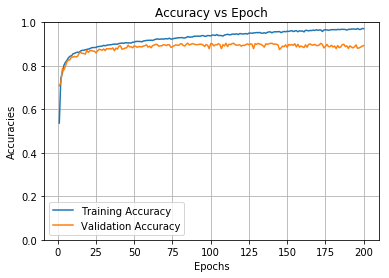

In [16]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

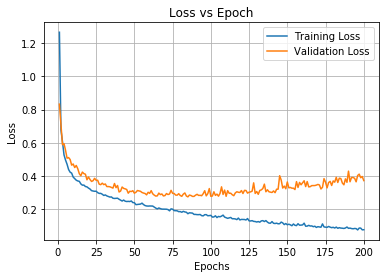

In [17]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 
  
2.   What does the loss of the testing set go to? 

  ANS: 

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS:

#Part 4-I: Dropout on Hidden Layers

In [19]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
       
    # Layer 1
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
              
    # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 3
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    model.add(Dropout(0.3))
              
    # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 5
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))     
    return model

#Create instance of CNN model graph
obj = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 106us/step - loss: 1.1524 - acc: 0.5742 - val_loss: 0.8524 - val_acc: 0.7080
Epoch 2/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.6077 - acc: 0.7704 - val_loss: 0.6774 - val_acc: 0.7848
Epoch 3/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.4988 - acc: 0.8145 - val_loss: 0.5944 - val_acc: 0.8080
Epoch 4/200
60000/60000 [==============================] - 6s 97us/step - loss: 0.4461 - acc: 0.8372 - val_loss: 0.5585 - val_acc: 0.8136
Epoch 5/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.4039 - acc: 0.8545 - val_loss: 0.5078 - val_acc: 0.8312
Epoch 6/200
60000/60000 [==============================] - 6s 97us/step - loss: 0.3826 - acc: 0.8606 - val_loss: 0.4692 - val_acc: 0.8564
Epoch 7/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.3594 - acc: 0.8700 - val_loss: 0.4707 -

60000/60000 [==============================] - 6s 96us/step - loss: 0.1365 - acc: 0.9488 - val_loss: 0.2352 - val_acc: 0.9179
Epoch 60/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1227 - acc: 0.9535 - val_loss: 0.2299 - val_acc: 0.9206
Epoch 61/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1223 - acc: 0.9544 - val_loss: 0.2277 - val_acc: 0.9193
Epoch 62/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1220 - acc: 0.9543 - val_loss: 0.2956 - val_acc: 0.8856
Epoch 63/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1327 - acc: 0.9506 - val_loss: 0.2310 - val_acc: 0.9201
Epoch 64/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1142 - acc: 0.9575 - val_loss: 0.2324 - val_acc: 0.9197
Epoch 65/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1161 - acc: 0.9556 - val_loss: 0.2306 - val_acc: 0.9199
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0401 - acc: 0.9854 - val_loss: 0.2535 - val_acc: 0.9202
Epoch 119/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.0402 - acc: 0.9852 - val_loss: 0.2522 - val_acc: 0.9218
Epoch 120/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0474 - acc: 0.9821 - val_loss: 0.2534 - val_acc: 0.9277
Epoch 121/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0420 - acc: 0.9843 - val_loss: 0.2489 - val_acc: 0.9241
Epoch 122/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0454 - acc: 0.9834 - val_loss: 0.2620 - val_acc: 0.9199
Epoch 123/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0397 - acc: 0.9854 - val_loss: 0.2661 - val_acc: 0.9192
Epoch 124/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0416 - acc: 0.9847 - val_loss: 0.2736 - val_acc: 0.9181
Epoch 125/200
60000/

60000/60000 [==============================] - 6s 96us/step - loss: 0.0453 - acc: 0.9839 - val_loss: 0.2864 - val_acc: 0.9250
Epoch 177/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0209 - acc: 0.9926 - val_loss: 0.3125 - val_acc: 0.9240
Epoch 178/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0262 - acc: 0.9903 - val_loss: 0.3158 - val_acc: 0.9222
Epoch 179/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0299 - acc: 0.9892 - val_loss: 0.3091 - val_acc: 0.9206
Epoch 180/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0262 - acc: 0.9907 - val_loss: 0.3114 - val_acc: 0.9233
Epoch 181/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0169 - acc: 0.9942 - val_loss: 0.3193 - val_acc: 0.9225
Epoch 182/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.0198 - acc: 0.9929 - val_loss: 0.3169 - val_acc: 0.9254
Epoch 183/200
60000/60000 [=======

In [20]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 25us/step
Test Accuracy: 92.30%


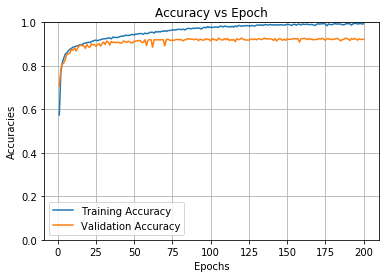

In [21]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

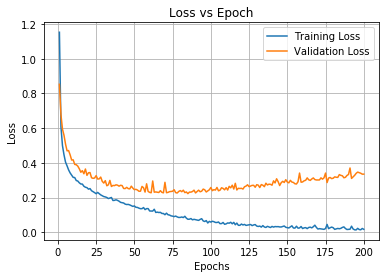

In [22]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: 
  
2.   What does the loss of the testing set go to? 

  ANS: 

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: 
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: 

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [31]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Layer 1 - dropout
    model.add(Dropout(0.3))
    
    # Layer 2
    model.add(Conv2D(256, (3, 3), 
              activation="relu", 
              input_shape=(28, 28,1)))
    model.add(Dropout(0.3))
              
    # Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 4
    model.add(Conv2D(128, (3, 3), 
              activation="relu"))
    model.add(Dropout(0.3))
              
    # Layer 5
    model.add(MaxPooling2D(pool_size=(2, 2),
              padding='valid'))
    
    # Layer 6
    model.add(Flatten())
        
    # FC Layer 1
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(100, activation="relu",
                    kernel_initializer="normal"))
    
    # FC Layer 3
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))         
    return model


#Create instance of CNN model graph
obj = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(data_train, labels_train, 
                        validation_data=(data_test, labels_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 107us/step - loss: 1.1100 - acc: 0.5982 - val_loss: 0.9486 - val_acc: 0.6939
Epoch 2/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.6438 - acc: 0.7565 - val_loss: 0.7944 - val_acc: 0.7667
Epoch 3/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.5573 - acc: 0.7919 - val_loss: 0.7088 - val_acc: 0.7964
Epoch 4/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.5118 - acc: 0.8088 - val_loss: 0.7062 - val_acc: 0.8013
Epoch 5/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4902 - acc: 0.8179 - val_loss: 0.6610 - val_acc: 0.8227
Epoch 6/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4633 - acc: 0.8254 - val_loss: 0.6752 - val_acc: 0.8279
Epoch 7/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4417 - acc: 0.8352 - val_loss: 0.6440 -

60000/60000 [==============================] - 6s 96us/step - loss: 0.2469 - acc: 0.9054 - val_loss: 0.3533 - val_acc: 0.8833
Epoch 60/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.2384 - acc: 0.9097 - val_loss: 0.3590 - val_acc: 0.8721
Epoch 61/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.2386 - acc: 0.9083 - val_loss: 0.3474 - val_acc: 0.8835
Epoch 62/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.2352 - acc: 0.9101 - val_loss: 0.3420 - val_acc: 0.8925
Epoch 63/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.2485 - acc: 0.9048 - val_loss: 0.3505 - val_acc: 0.8844
Epoch 64/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.2333 - acc: 0.9106 - val_loss: 0.3689 - val_acc: 0.8742
Epoch 65/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.2379 - acc: 0.9083 - val_loss: 0.3414 - val_acc: 0.8881
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1682 - acc: 0.9346 - val_loss: 0.3235 - val_acc: 0.8768
Epoch 119/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1693 - acc: 0.9351 - val_loss: 0.3318 - val_acc: 0.8754
Epoch 120/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1651 - acc: 0.9352 - val_loss: 0.3212 - val_acc: 0.8777
Epoch 121/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1643 - acc: 0.9362 - val_loss: 0.3339 - val_acc: 0.8750
Epoch 122/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1680 - acc: 0.9349 - val_loss: 0.3065 - val_acc: 0.8840
Epoch 123/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1591 - acc: 0.9386 - val_loss: 0.3388 - val_acc: 0.8663
Epoch 124/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1604 - acc: 0.9377 - val_loss: 0.3222 - val_acc: 0.8767
Epoch 125/200
60000/

60000/60000 [==============================] - 6s 96us/step - loss: 0.1238 - acc: 0.9520 - val_loss: 0.3517 - val_acc: 0.8670
Epoch 177/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1276 - acc: 0.9505 - val_loss: 0.3635 - val_acc: 0.8634
Epoch 178/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1190 - acc: 0.9543 - val_loss: 0.3538 - val_acc: 0.8651
Epoch 179/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1254 - acc: 0.9508 - val_loss: 0.3503 - val_acc: 0.8684
Epoch 180/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1201 - acc: 0.9535 - val_loss: 0.3642 - val_acc: 0.8638
Epoch 181/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1174 - acc: 0.9541 - val_loss: 0.3620 - val_acc: 0.8643
Epoch 182/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.1162 - acc: 0.9549 - val_loss: 0.3350 - val_acc: 0.8732
Epoch 183/200
60000/60000 [=======

In [32]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(data_test, labels_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 24us/step
Test Accuracy: 87.53%


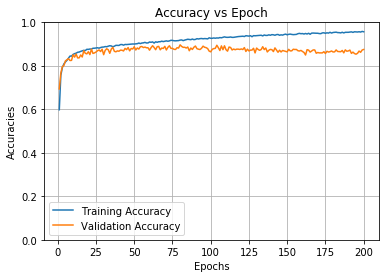

In [34]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

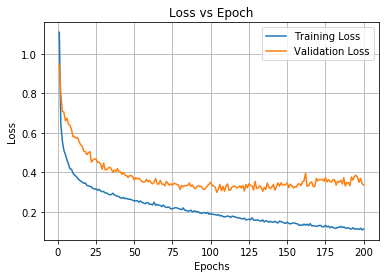

In [35]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 
  
2.   What does the loss of the testing set go to? 

  ANS:
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: 

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS:

#Part 5 : Activation Functions

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN

#Train the model and assign training meta-data to a variable
#FILL THIS IN

#Print accuracy of model on testing set after training 
#FILL THIS IN

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS:
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS:

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: 

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: 


#Part 6: Creating a CLDNN

In [ ]:
Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [4]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

--2020-09-21 12:40:19--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

100%[====================================>] 1,245,608,913 1.11MB/s   in 18m 36s

2020-09-21 12:58:55 (1.06 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [2]:
#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))

In [3]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

In [5]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Layer 1
    model.add(Conv2D(256, (1, 3), 
              activation="relu", 
              input_shape=(2, 128,1)))
    model.add(Dropout(0.20))
    
    # Layer 2
    model.add(Conv2D(256, (2, 3), 
              activation="relu"))
    
    # Layer 3
    model.add(Conv2D(80, (1, 3),
              activation="relu"))
    model.add(Dropout(.20))
    
    # Layer 4
    model.add(Conv2D(80, (1, 3), 
              activation="relu"))
    
    # Reshape
    model.add(Reshape((16, 600)))
    
    # LSTM
    model.add(LSTM(50))
    
    # FC Layer 1
    model.add(Dense(128, activation="relu",
                    kernel_initializer="normal"))
    # FC Layer 2
    model.add(Dense(10, activation="softmax",
                    kernel_initializer="normal"))
    
    return model

#Create instance of CNN model graph
obj = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
obj.compile(loss="categorical_crossentropy",
            metrics=['accuracy'],
            optimizer="adam")

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist = obj.fit(X_train, Y_train, 
                        validation_data=(X_test, Y_test), 
                        shuffle=True,
                        epochs=200, 
                        batch_size=1536) 

Train on 432000 samples, validate on 108000 samples
Epoch 1/200
432000/432000 [==============================] - 44s 102us/step - loss: 1.6680 - acc: 0.3069 - val_loss: 1.0607 - val_acc: 0.4935
Epoch 2/200
432000/432000 [==============================] - 43s 100us/step - loss: 0.7233 - acc: 0.6560 - val_loss: 0.5174 - val_acc: 0.7334
Epoch 3/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.4879 - acc: 0.7468 - val_loss: 0.4574 - val_acc: 0.7625
Epoch 4/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.4265 - acc: 0.7769 - val_loss: 0.4321 - val_acc: 0.7717
Epoch 5/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.3872 - acc: 0.7915 - val_loss: 0.3667 - val_acc: 0.7996
Epoch 6/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.3604 - acc: 0.8030 - val_loss: 0.3431 - val_acc: 0.8009
Epoch 7/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.3435 - acc: 0.8

432000/432000 [==============================] - 43s 99us/step - loss: 0.1175 - acc: 0.9343 - val_loss: 0.1657 - val_acc: 0.9214
Epoch 116/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1174 - acc: 0.9344 - val_loss: 0.1647 - val_acc: 0.9220
Epoch 117/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1174 - acc: 0.9341 - val_loss: 0.1654 - val_acc: 0.9209
Epoch 118/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1184 - acc: 0.9340 - val_loss: 0.1653 - val_acc: 0.9211
Epoch 119/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1163 - acc: 0.9344 - val_loss: 0.1712 - val_acc: 0.9205
Epoch 120/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1159 - acc: 0.9352 - val_loss: 0.1702 - val_acc: 0.9211
Epoch 121/200
432000/432000 [==============================] - 43s 99us/step - loss: 0.1163 - acc: 0.9346 - val_loss: 0.1903 - val_acc: 0.9150
Epoch 122/200

In [31]:
#Print accuracy of model on testing set after training 
#FILL THIS IN
[test_loss,test_acc] = obj.evaluate(X_test, Y_test, 
                                    batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

108000/108000 [==============================] - 5s 47us/step
Test Accuracy: 92.32%


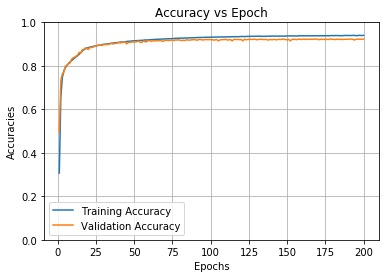

In [49]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['acc'])
plt.plot(range(1,201),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

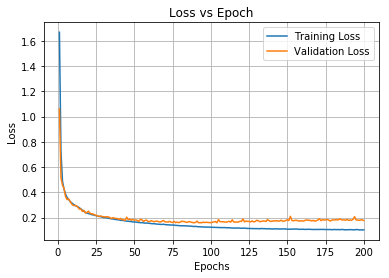

In [40]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(range(1,201),hist.history['loss'])
plt.plot(range(1,201),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: 

2.   Give two ways to improve the robustness of the model.

  ANS: 